<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(0_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.295314,99.731283,31.945472,63.326487,1.278188,301.576743,298.964938,2.611804
1,0.0,1.0,62.341958,92.738979,37.239107,51.994211,-9.612941,244.701315,253.492561,-8.791247
2,0.0,2.0,82.767350,34.887227,94.604833,99.787529,-7.164203,314.882736,318.314421,-3.431686
3,0.0,3.0,49.539820,49.999782,53.122462,85.876007,3.218014,251.756086,246.117904,5.638182
4,0.0,4.0,98.457591,44.031028,65.231268,30.136533,-2.590530,245.265889,245.710081,-0.444192
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.596603,29.318595,48.777026,28.089562,-5.060529,182.721258,183.185210,-0.463952
19996,999.0,16.0,30.657670,99.609873,54.056862,74.746229,-4.465920,264.604714,266.372556,-1.767842
19997,999.0,17.0,57.560842,69.461073,38.185239,58.082366,-3.145790,230.143730,229.386889,0.756841
19998,999.0,18.0,21.256972,23.348378,23.803154,82.160932,-4.681098,155.888337,156.974892,-1.086555


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.295314  99.731283  31.945472  63.326487  1.278188  301.576743   
      1.0    62.341958  92.738979  37.239107  51.994211 -9.612941  244.701315   
      2.0    82.767350  34.887227  94.604833  99.787529 -7.164203  314.882736   
      3.0    49.539820  49.999782  53.122462  85.876007  3.218014  251.756086   
      4.0    98.457591  44.031028  65.231268  30.136533 -2.590530  245.265889   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   71.596603  29.318595  48.777026  28.089562 -5.060529  182.721258   
      16.0   30.657670  99.609873  54.056862  74.746229 -4.465920  264.604714   
      17.0   57.560842  69.461073  38.185239  58.082366 -3.145790  230.143730   
      18.0   21.256972  23.348378  23.803154  82.160932 -4.681098  155.888337   
      19.0   42.077897  86.238056  76.790919  20.572005  0.460902  236.139779   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    298.964938  2.611804  
      1.0    253.492561 -8.791247  
      2.0    318.314421 -3.431686  
      3.0    246.117904  5.638182  
      4.0    245.710081 -0.444192  
...                 ...       ...  
999.0 15.0   183.185210 -0.463952  
      16.0   266.372556 -1.767842  
      17.0   229.386889  0.756841  
      18.0   156.974892 -1.086555  
      19.0   231.207658  4.932121  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.295314  99.731283  31.945472  63.326487  1.278188  301.576743   
      1.0    62.341958  92.738979  37.239107  51.994211 -9.612941  244.701315   
      2.0    82.767350  34.887227  94.604833  99.787529 -7.164203  314.882736   
      3.0    49.539820  49.999782  53.122462  85.876007  3.218014  251.756086   
      4.0    98.457591  44.031028  65.231268  30.136533 -2.590530  245.265889   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   71.596603  29.318595  48.777026  28.089562 -5.060529  182.721258   
      16.0   30.657670  99.609873  54.056862  74.746229 -4.465920  264.604714   
      17.0   57.560842  69.461073  38.185239  58.082366 -3.145790  230.143730   
      18.0   21.256972  23.348378  23.803154  82.160932 -4.681098  155.888337   
      19.0   42.077897  86.238056  76.790919  20.572005  0.460902  236.139779   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    298.964938  2.611804  
      1.0    253.492561 -8.791247  
      2.0    318.314421 -3.431686  
      3.0    246.117904  5.638182  
      4.0    245.710081 -0.444192  
...                 ...       ...  
999.0 15.0   183.185210 -0.463952  
      16.0   266.372556 -1.767842  
      17.0   229.386889  0.756841  
      18.0   156.974892 -1.086555  
      19.0   231.207658  4.932121  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.295314,99.731283,31.945472,63.326487,1.278188,301.576743,298.964938,2.611804
1,0.0,1.0,62.341958,92.738979,37.239107,51.994211,-9.612941,244.701315,253.492561,-8.791247
2,0.0,2.0,82.767350,34.887227,94.604833,99.787529,-7.164203,314.882736,318.314421,-3.431686
3,0.0,3.0,49.539820,49.999782,53.122462,85.876007,3.218014,251.756086,246.117904,5.638182
4,0.0,4.0,98.457591,44.031028,65.231268,30.136533,-2.590530,245.265889,245.710081,-0.444192
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.596603,29.318595,48.777026,28.089562,-5.060529,182.721258,183.185210,-0.463952
19996,999.0,16.0,30.657670,99.609873,54.056862,74.746229,-4.465920,264.604714,266.372556,-1.767842
19997,999.0,17.0,57.560842,69.461073,38.185239,58.082366,-3.145790,230.143730,229.386889,0.756841
19998,999.0,18.0,21.256972,23.348378,23.803154,82.160932,-4.681098,155.888337,156.974892,-1.086555


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.295314  99.731283  31.945472  63.326487  1.278188  301.576743   
      1.0    62.341958  92.738979  37.239107  51.994211 -9.612941  244.701315   
      2.0    82.767350  34.887227  94.604833  99.787529 -7.164203  314.882736   
      3.0    49.539820  49.999782  53.122462  85.876007  3.218014  251.756086   
      4.0    98.457591  44.031028  65.231268  30.136533 -2.590530  245.265889   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   71.596603  29.318595  48.777026  28.089562 -5.060529  182.721258   
      16.0   30.657670  99.609873  54.056862  74.746229 -4.465920  264.604714   
      17.0   57.560842  69.461073  38.185239  58.082366 -3.145790  230.143730   
      18.0   21.256972  23.348378  23.803154  82.160932 -4.681098  155.888337   
      19.0   42.077897  86.238056  76.790919  20.572005  0.460902  236.139779   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    298.964938  2.611804  
      1.0    253.492561 -8.791247  
      2.0    318.314421 -3.431686  
      3.0    246.117904  5.638182  
      4.0    245.710081 -0.444192  
...                 ...       ...  
999.0 15.0   183.185210 -0.463952  
      16.0   266.372556 -1.767842  
      17.0   229.386889  0.756841  
      18.0   156.974892 -1.086555  
      19.0   231.207658  4.932121  

[20000 rows x 8 columns]

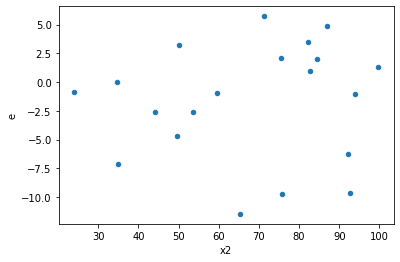

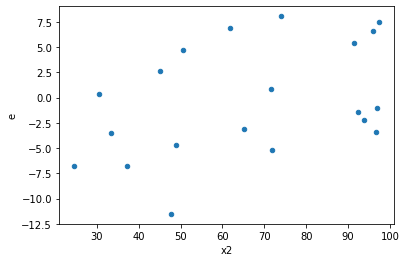

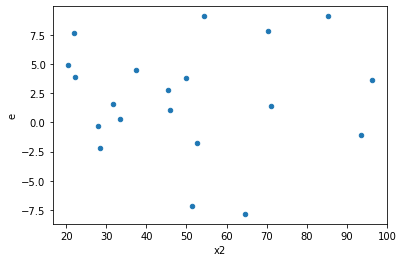

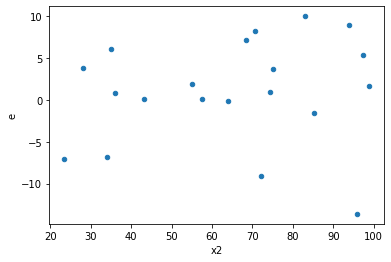

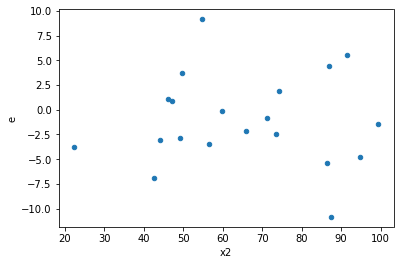

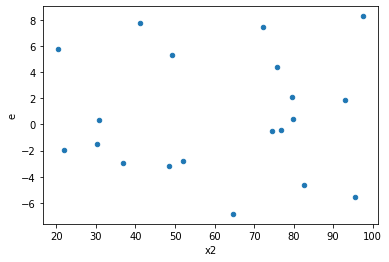

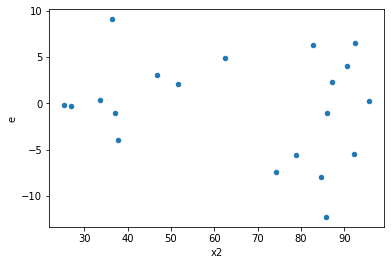

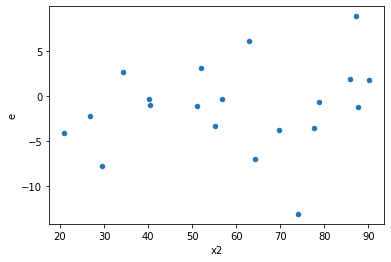

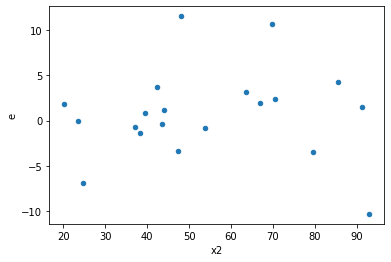

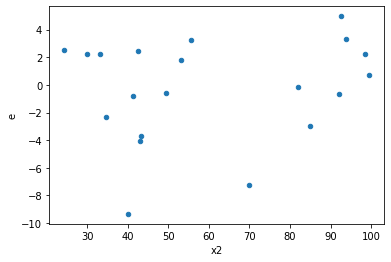

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,186.52742080183629,192.45395172848242,31.087903466972715,32.07565862141374,1.031772974188832,0.9706834299287452,0.5146582850356274,0.4853417149643726,Reject005=1 : Homoscedasticity
5.0,3.0,9.0,40.38856929886619,198.87958528806425,13.462856432955396,22.097731698673805,1.6413850811467698,0.4958615196177505,0.7520692401911248,0.24793075980887525,Reject005=1 : Homoscedasticity
6.0,2.0,10.0,31.427822547737794,163.8364421379069,15.713911273868897,16.38364421379069,1.0426203844637656,0.7758065826441787,0.6120967086779107,0.38790329132208934,Reject005=1 : Homoscedasticity
8.0,5.0,7.0,92.85033357480381,272.3472022833882,18.570066714960763,38.90674318334117,2.0951321166765866,0.36205470639140147,0.8189726468042993,0.18102735319570074,Reject005=1 : Homoscedasticity
10.0,5.0,7.0,60.959435318545296,130.19213727859102,12.191887063709059,18.598876754084433,1.5255125524781736,0.5892627186991917,0.7053686406504042,0.29463135934959583,Reject005=1 : Homoscedasticity
11.0,5.0,7.0,25.876333091163048,88.10019789323518,5.17526661823261,12.585742556176454,2.4319022544339126,0.2779474146380658,0.8610262926809671,0.1389737073190329,Reject005=1 : Homoscedasticity
16.0,5.0,7.0,38.946171666042424,91.00704382257578,7.789234333208485,13.00100626036797,1.6690993882337968,0.5186784062991436,0.7406607968504282,0.2593392031495718,Reject005=1 : Homoscedasticity
19.0,3.0,9.0,2.0697724041770647,390.80388301719347,0.6899241347256883,43.422653668577055,62.93830217411045,4.639753674151592e-06,0.9999976801231629,2.319876837075796e-06,Reject005=0 : Heteroscedasticity
20.0,2.0,10.0,40.82397100235907,189.29278890180464,20.411985501179537,18.929278890180463,0.9273609805908694,0.8542266825246769,0.5728866587376615,0.42711334126233846,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,186.52742080183629,192.45395172848242,31.087903466972715,32.07565862141374,1.031772974188832,0.9706834299287452,Reject005=1 : Homoscedasticity
1.0,7.0,5.0,99.21083153634531,68.30773055526129,14.172975933763615,13.661546111052257,0.9639151420914359,0.9286785987547153,Reject005=1 : Homoscedasticity
2.0,9.0,3.0,239.65116690273655,12.314552029703517,26.627907433637393,4.104850676567839,0.1541559616277783,0.025035577369267346,Reject005=0 : Heteroscedasticity
3.0,7.0,5.0,381.36970693725374,33.461438444759075,54.48138670532196,6.692287688951815,0.1228362215732311,0.01566783007432534,Reject005=0 : Heteroscedasticity
4.0,3.0,9.0,123.71077623451659,142.82180922128154,41.23692541150553,15.869089913475726,0.38482718474079264,0.4667406176043855,Reject005=1 : Homoscedasticity
5.0,3.0,9.0,40.38856929886619,198.87958528806425,13.462856432955396,22.097731698673805,1.6413850811467698,0.4958615196177505,Reject005=1 : Homoscedasticity
6.0,2.0,10.0,31.427822547737794,163.8364421379069,15.713911273868897,16.38364421379069,1.0426203844637656,0.7758065826441787,Reject005=1 : Homoscedasticity
7.0,10.0,2.0,236.72969041800124,0.6827454335679289,23.672969041800123,0.34137271678396447,0.01442035919453921,2.751568260038436e-06,Reject005=0 : Heteroscedasticity
8.0,5.0,7.0,92.85033357480381,272.3472022833882,18.570066714960763,38.90674318334117,2.0951321166765866,0.36205470639140147,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      797
Reject005=0 : Heteroscedasticity    203
Name: Result_test, dtype: int64